In [63]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# imdb : 영화 리뷰 데이터(긍정, 부정) // num_words : 많이 사용된 순으로 1위~500위까지 가져옴
(train_input,train_target),(test_input,test_target)=keras.datasets.imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target=train_test_split(train_input, train_target, test_size=0.2)

In [65]:
# 2 : 500위 안에 못든 단어
train_input[0]

[1,
 7,
 265,
 4,
 114,
 229,
 5,
 262,
 2,
 26,
 2,
 11,
 4,
 22,
 38,
 111,
 478,
 183,
 8,
 67,
 31,
 2,
 13,
 423,
 262,
 9,
 4,
 326,
 7,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 27,
 445,
 23,
 4,
 2,
 27,
 2,
 2,
 35,
 2,
 2,
 11,
 289,
 418,
 5,
 2,
 2,
 46,
 8,
 30,
 6,
 147,
 2,
 5,
 6,
 371,
 478,
 2,
 2,
 8,
 27,
 2,
 4,
 2,
 2,
 271,
 367,
 19,
 4,
 2,
 33,
 4,
 130,
 8,
 2,
 4,
 477,
 2,
 18,
 4,
 2,
 2,
 2,
 47,
 2,
 6,
 2,
 46,
 6,
 2,
 2,
 21,
 38,
 2,
 8,
 90,
 34,
 96,
 7,
 4,
 2,
 2,
 2,
 2,
 2,
 11,
 341,
 95,
 88,
 7,
 4,
 2,
 7,
 35,
 2,
 2,
 2,
 2,
 2,
 63,
 29,
 2,
 46,
 11,
 6,
 2,
 2,
 7,
 2,
 9,
 2,
 8,
 30,
 256,
 4,
 2,
 2,
 2,
 4,
 297,
 5,
 2,
 12,
 2,
 2,
 44,
 6,
 2,
 130,
 2]

In [66]:
train_target[0]
# 1이면 긍정 0이면 부정

1

In [67]:
import numpy as np
box=[]

for i in train_input:
    box.append(len(i))

np.mean(box)
# 리뷰에 평균적으로 쓰이는 단어의 수

238.78715

In [72]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 단어가 적든 많든 무조건 리뷰 안에 있는 단어를 100개로 맞춘다.
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)


In [73]:
# 단어가 많으면 앞에서부터 자름
# 단어가 적으면 0으로 채움
train_seq.shape

(20000, 100)

In [84]:
train_seq[1]

array([  2,  16,  24,   4,  20,   2,   2,  23,  18,   2,   2,   5,   2,
        47,   8,  30, 128,  74,   2,   2,   4,   2, 365,   2,  47,  24,
        93,  12,  53,   2,   5,  93,   2, 168, 433,  13, 235,  78,  18,
         2, 488,   2,   5,   2,   2,   2,  17,  36,  26,   2,  30,   2,
         2,  18,   4,   2,   2, 365,   2,   2,  10,  10,  38, 150,  14,
         2,   2,  11,   4,   2,   2,   8, 216,  56,  19, 142,   8,   2,
        18,  14,   2,  21, 103, 319,  89,  78,   2,   2,  47,   2,  46,
        81,  75,  66, 181,  90,   8,  97, 160,  20], dtype=int32)

In [85]:
# one hot encoding : 해당 숫자만 1이고 나머지 다 0인

train_oh = keras.utils.to_categorical(train_seq)
val_oh = keras.utils.to_categorical(val_seq)

In [86]:
train_oh.shape
# 500글자를 가져와서 500이됨

(20000, 100, 500)

In [89]:
train_oh[1]
# 한 줄이 한 단어가 됨.
# train_seq[1]의 첫번째 값이 2였기에 밑에보면 첫번째 리스트의 2번 위치의 값이 1임

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [98]:
model=keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(2,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

es=keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

hist=model.fit(train_oh, train_target, epochs=10000, validation_data=(val_oh, val_target),
               callbacks=[es])

Epoch 1/10000
625/625 [==============================] - 20s 31ms/step - loss: 0.6888 - accuracy: 0.5391 - val_loss: 0.6799 - val_accuracy: 0.5670
Epoch 2/10000
625/625 [==============================] - 22s 35ms/step - loss: 0.6161 - accuracy: 0.6627 - val_loss: 0.5357 - val_accuracy: 0.7406
Epoch 3/10000
625/625 [==============================] - 19s 30ms/step - loss: 0.4938 - accuracy: 0.7667 - val_loss: 0.4773 - val_accuracy: 0.7718
Epoch 4/10000
625/625 [==============================] - 19s 31ms/step - loss: 0.4543 - accuracy: 0.7922 - val_loss: 0.4610 - val_accuracy: 0.7852
Epoch 5/10000
625/625 [==============================] - 20s 32ms/step - loss: 0.4369 - accuracy: 0.8012 - val_loss: 0.4541 - val_accuracy: 0.7908
Epoch 6/10000
625/625 [==============================] - 20s 32ms/step - loss: 0.4336 - accuracy: 0.8026 - val_loss: 0.4740 - val_accuracy: 0.7714
Epoch 7/10000
625/625 [==============================] - 19s 31ms/step - loss: 0.4244 - accuracy: 0.8069 - val_loss: 0

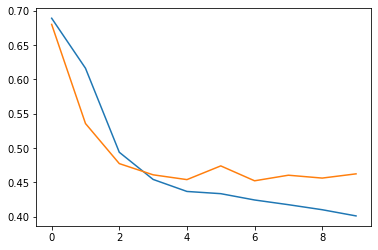

In [99]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss '])